In [1]:
'''1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy'''

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Trees as base estimators
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,  # Number of base estimators (trees)
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy}")


Accuracy of Bagging Classifier: 0.9


In [4]:
'''2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)'''

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize BaggingRegressor with DecisionTreeRegressor as base estimator
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,  # Number of base estimators (trees)
    random_state=42
)

# Train the BaggingRegressor
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6967.863746774799


In [5]:
'''3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importance scores
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.048703371737755234
Feature 1: 0.013590877656998469
Feature 2: 0.053269746128179675
Feature 3: 0.04755500886018552
Feature 4: 0.007285327830663239
Feature 5: 0.013944325074050485
Feature 6: 0.06800084191430111
Feature 7: 0.10620998844591638
Feature 8: 0.003770291819290666
Feature 9: 0.0038857721093275
Feature 10: 0.02013891719419153
Feature 11: 0.004723988073894702
Feature 12: 0.01130301388178435
Feature 13: 0.022406960160458473
Feature 14: 0.004270910110504497
Feature 15: 0.005253215538990106
Feature 16: 0.009385832251596627
Feature 17: 0.003513255105598506
Feature 18: 0.004018418617722808
Feature 19: 0.00532145634222884
Feature 20: 0.07798687515738047
Feature 21: 0.021749011006763207
Feature 22: 0.06711483267839194
Feature 23: 0.15389236463205394
Feature 24: 0.010644205147280952
Feature 25: 0.020266035899623565
Feature 26: 0.031801595740040434
Feature 27: 0.14466326620735528
Feature 28: 0.010120176131974357
Feature 29: 0.005210118545497296


In [6]:
'''4. Train a Random Forest Regressor and compare its performance with a single Decision Tree'''

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions and evaluate
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

# Initialize and train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions and evaluate
dt_predictions = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree Regressor MSE: {dt_mse}")

# Compare performance
print(f"Random Forest outperforms Decision Tree by: {dt_mse - rf_mse}")


Random Forest Regressor MSE: 7055.507694741972
Decision Tree Regressor MSE: 20519.297540712625
Random Forest outperforms Decision Tree by: 13463.789845970652


In [7]:
'''5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier with OOB scoring
rf_classifier = RandomForestClassifier(random_state=42, oob_score=True) #Enable OOB score calculation
rf_classifier.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_classifier.oob_score_
print(f"Out-of-Bag (OOB) Score: {oob_score}")


Out-of-Bag (OOB) Score: 0.9560439560439561


In [8]:
'''6 Train a Bagging Classifier using SVM as a base estimator and print accuracy'''

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with SVM as the base estimator
bagging_clf = BaggingClassifier(
    estimator=SVC(),  # Use SVM as the base estimator
    n_estimators=10,  # Number of base estimators
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier with SVM: {accuracy}")


Accuracy of Bagging Classifier with SVM: 0.87


In [9]:
'''7. Train a Random Forest Classifier with different numbers of trees and compare accuracy'''

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of trees to try
n_estimators_list = [50, 100, 150, 200]

for n_estimators in n_estimators_list:
    # Initialize and train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n_estimators} trees: {accuracy}")


Accuracy with 50 trees: 0.9649122807017544
Accuracy with 100 trees: 0.9649122807017544
Accuracy with 150 trees: 0.9649122807017544
Accuracy with 200 trees: 0.9649122807017544


In [10]:
'''8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score'''

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Logistic Regression as base estimators
bagging_clf = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=100,  # Number of base estimators
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1] # Probability estimates for the positive class

# Calculate and print the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score of Bagging Classifier with Logistic Regression: {auc_score}")


AUC Score of Bagging Classifier with Logistic Regression: 0.9220178876494824


In [12]:
'''9. Train a Random Forest Regressor and analyze feature importance scores'''

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert to DataFrame for easier feature handling
feature_names = [f"feature_{i}" for i in range(X.shape[1])]  # Create feature names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


# Get feature importances
feature_importances = rf_regressor.feature_importances_


# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,feature_1,0.236908
17,feature_17,0.184807
4,feature_4,0.172182
0,feature_0,0.146803
6,feature_6,0.105108
11,feature_11,0.025765
15,feature_15,0.018097
2,feature_2,0.009577
18,feature_18,0.009549
10,feature_10,0.009063


In [14]:
'''10. Train an ensemble model using both Bagging and Random Forest and compare accuracy'''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy results
print(f"Bagging Classifier Accuracy: {acc_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")


Bagging Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000


In [18]:
'''11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV'''

from sklearn.model_selection import GridSearchCV

# Load the breast cancer dataset (or your own dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9626373626373625
Test Accuracy: 0.9649122807017544


Mean Squared Error with 10 estimators: 7484.147276569565
Mean Squared Error with 50 estimators: 7109.3878911872125
Mean Squared Error with 100 estimators: 6967.863746774799
Mean Squared Error with 200 estimators: 6688.668787904271


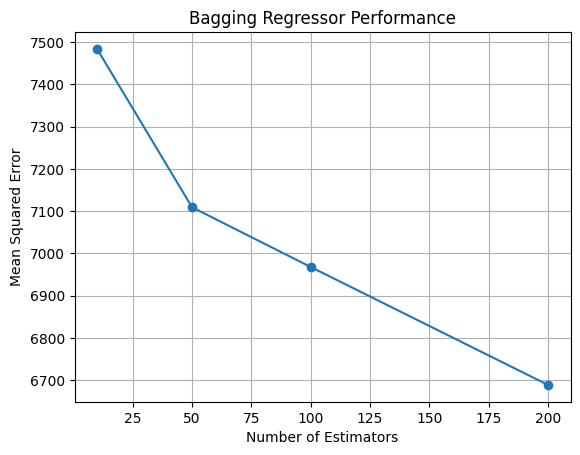

In [19]:
'''12.  Train a Bagging Regressor with different numbers of base estimators and compare performance'''

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of base estimators to try
n_estimators_list = [10, 50, 100, 200]
mse_scores = []

for n_estimators in n_estimators_list:
    # Initialize BaggingRegressor with DecisionTreeRegressor as base estimator
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,  # Number of base estimators (trees)
        random_state=42
    )

    # Train the BaggingRegressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Mean Squared Error with {n_estimators} estimators: {mse}")

# Plotting MSE scores
plt.plot(n_estimators_list, mse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance')
plt.grid(True)
plt.show()


Random Forest Classifier Accuracy: 0.7700

Misclassified Samples:
Sample 1: True Label=1, Predicted=2, Features=[ 1.15869935  1.72513094  0.56095943  1.52286419 -1.15414627 -0.60840341
  2.85442141  3.48563351 -1.11025526  0.08926734]
Sample 2: True Label=1, Predicted=2, Features=[ 1.91092388  0.35406011 -0.12263925  1.44956314 -1.44118484  0.454837
  1.21304025  0.32281329  1.69158227  0.32700985]
Sample 3: True Label=1, Predicted=2, Features=[-1.70104274 -2.27134481  0.50100872  0.37673393 -3.48619878 -2.75678544
 -2.18963396  2.41568894  1.08968003  0.43982912]
Sample 4: True Label=1, Predicted=0, Features=[ 1.12113415  3.04445415  2.14270499  0.87204021  3.22419104  0.16717855
  2.15680726  1.8992486  -2.21032241  1.46874142]
Sample 5: True Label=1, Predicted=0, Features=[ 0.04732329  0.83792401 -1.22370184  0.44492928 -3.95524074  2.24577382
  1.02818547  5.01865433 -2.35699822 -2.23096314]


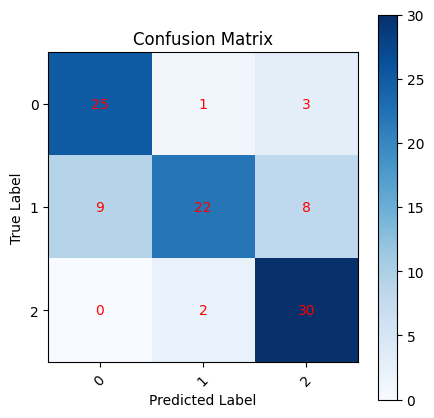

In [20]:
'''13.Train a Random Forest Classifier and analyze misclassified samples'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=3, random_state=42)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Find misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_idx]

# Print misclassified samples
print("\nMisclassified Samples:")
for i, idx in enumerate(misclassified_idx[:5]):  # Display first 5 misclassified samples
    print(f"Sample {i+1}: True Label={y_test[idx]}, Predicted={y_pred[idx]}, Features={X_test[idx]}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(set(y))), np.arange(len(set(y))), rotation=45)
plt.yticks(np.arange(len(set(y))), np.arange(len(set(y))))
plt.colorbar()

# Annotate confusion matrix
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red")

plt.show()



In [23]:
'''14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=3, random_state=42)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

# Print accuracy comparison
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Bagging Classifier Accuracy: {acc_bagging:.4f}")



Decision Tree Accuracy: 0.6300
Bagging Classifier Accuracy: 0.7500


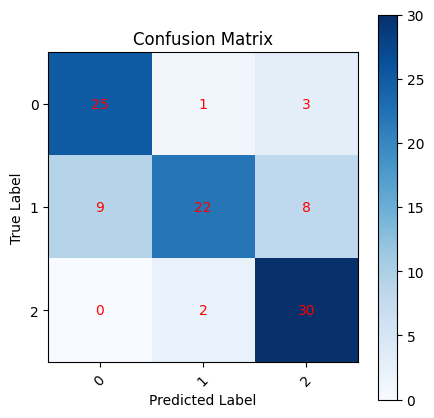

In [26]:
'''15. Train a Random Forest Classifier and visualize the confusion matrix'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=3, random_state=42)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(set(y))), np.arange(len(set(y))), rotation=45)
plt.yticks(np.arange(len(set(y))), np.arange(len(set(y))))
plt.colorbar()

# Annotate confusion matrix
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red")

plt.show()


In [27]:
'''16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy'''

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),  # Probability=True is needed for StackingClassifier
    ('lr', LogisticRegression())
]

# Define the meta-learner (the final estimator that combines the predictions)
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Classifier: {accuracy}")

# Train individual classifiers for comparison
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_clf.predict(X_test))
print(f"Accuracy of Decision Tree: {dt_accuracy}")

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_clf.predict(X_test))
print(f"Accuracy of SVM: {svm_accuracy}")

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_accuracy = accuracy_score(y_test, lr_clf.predict(X_test))
print(f"Accuracy of Logistic Regression: {lr_accuracy}")


Accuracy of Stacking Classifier: 0.88
Accuracy of Decision Tree: 0.87
Accuracy of SVM: 0.845
Accuracy of Logistic Regression: 0.855


In [28]:
'''17.  Train a Random Forest Classifier and print the top 5 most important features'''

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({'Feature': range(len(feature_importances)), 'Importance': feature_importances})

# Sort by importance and get the top 5
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Print the top 5 features
top_5_features


,Feature,Importance
23,23,0.153892
27,27,0.144663
7,7,0.106210
20,20,0.077987
6,6,0.068001


In [29]:
'''18.  Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score'''

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Generate Synthetic data
X,y = make_classification(n_samples=1000, n_features=20, random_state=42)

#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

#Testing
y_pred = bagging_clf.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")


Precision: 0.967741935483871
Recall: 0.8411214953271028
F1-score: 0.9


Accuracy with max_depth=None: 0.9649122807017544
Accuracy with max_depth=5: 0.9649122807017544
Accuracy with max_depth=10: 0.9649122807017544
Accuracy with max_depth=15: 0.9649122807017544
Accuracy with max_depth=20: 0.9649122807017544


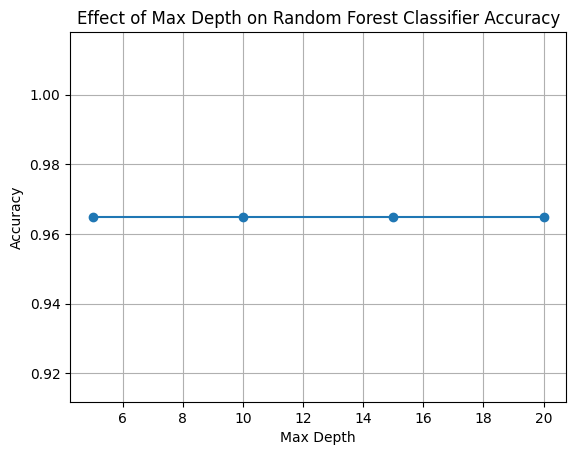

In [30]:
'''19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Max depths to evaluate
max_depths = [None, 5, 10, 15, 20]
accuracies = []

for max_depth in max_depths:
    # Initialize and train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with max_depth={max_depth}: {accuracy}")

# Plot the results
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Random Forest Classifier Accuracy')
plt.grid(True)
plt.show()


Mean Squared Error with DecisionTree base estimator: 2631.673483674254
Mean Squared Error with KNeighbors base estimator: 3530.3185956269713


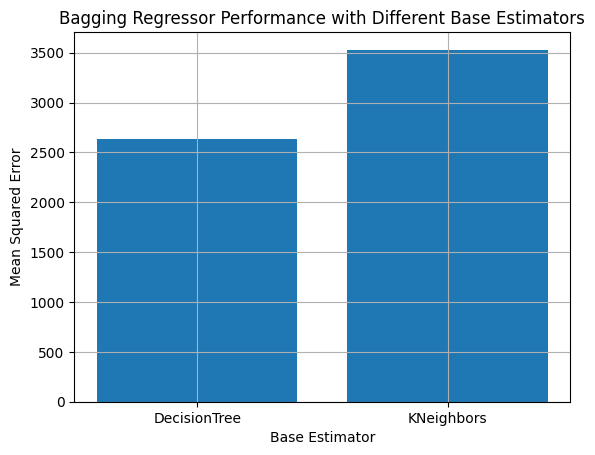

In [31]:
'''20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance'''

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = {
    'DecisionTree': DecisionTreeRegressor(),
    'KNeighbors': KNeighborsRegressor()
}

results = {}

for name, estimator in base_estimators.items():
  # Initialize BaggingRegressor with the current base estimator
  bagging_regressor = BaggingRegressor(
      estimator=estimator,
      n_estimators=100,
      random_state=42
  )

  # Train the BaggingRegressor
  bagging_regressor.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = bagging_regressor.predict(X_test)

  # Evaluate the model using Mean Squared Error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  results[name] = mse
  print(f"Mean Squared Error with {name} base estimator: {mse}")

# Plotting MSE scores
plt.bar(results.keys(), results.values())
plt.xlabel('Base Estimator')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance with Different Base Estimators')
plt.grid(True)
plt.show()


In [32]:
'''21.  Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score'''

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.9952505732066819


In [35]:
'''22. Train a Bagging Classifier and evaluate its performance using cross-validation'''

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_iris()
X, y = data.data, data.target

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Perform cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Accuracy: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean Accuracy: 0.9600
Std Accuracy: 0.0327


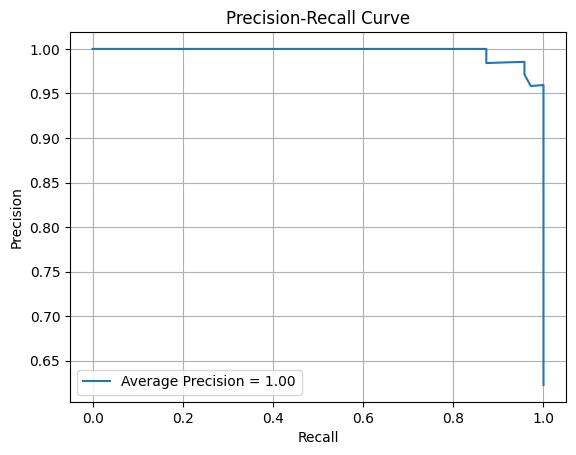

In [37]:
'''23. Train a Random Forest Classifier and plot the Precision-Recall curve'''

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


# Predict probabilities for the positive class
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
'''24.  Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy'''

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner (the final estimator that combines the predictions)
meta_learner = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate and print the accuracy for the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Classifier: {accuracy_stacking}")


# Train and evaluate individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of RandomForestClassifier: {accuracy_rf}")

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of LogisticRegression: {accuracy_lr}")


Accuracy of Stacking Classifier: 0.89
Accuracy of RandomForestClassifier: 0.9
Accuracy of LogisticRegression: 0.855


Mean Squared Error with bootstrap ratio 0.5: 7335.724876164529
Mean Squared Error with bootstrap ratio 0.7: 7243.94745679368
Mean Squared Error with bootstrap ratio 0.9: 6984.1646131844
Mean Squared Error with bootstrap ratio 1.0: 6967.863746774799


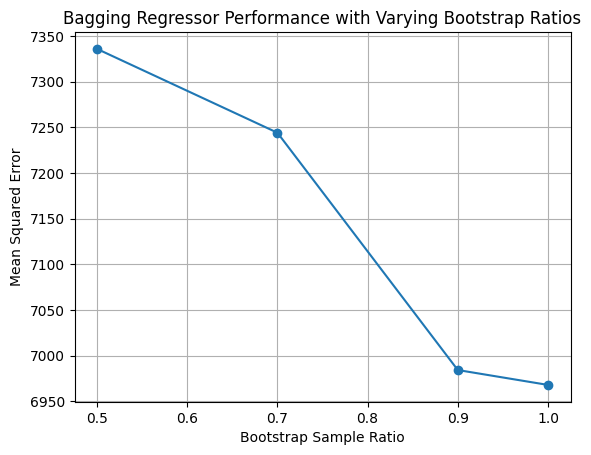

In [39]:
'''25.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.'''

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bootstrap sample ratios to try
bootstrap_ratios = [0.5, 0.7, 0.9, 1.0]  # Varying the proportion of samples drawn
mse_scores = []

for ratio in bootstrap_ratios:
    # Initialize BaggingRegressor with DecisionTreeRegressor as base estimator
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=ratio,  # Control the bootstrap sample size
        random_state=42
    )

    # Train the BaggingRegressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Mean Squared Error with bootstrap ratio {ratio}: {mse}")

# Plotting MSE scores
plt.plot(bootstrap_ratios, mse_scores, marker='o')
plt.xlabel('Bootstrap Sample Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance with Varying Bootstrap Ratios')
plt.grid(True)
plt.show()
